# Problem 1a

In [28]:
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt 


In [29]:
csvData = pd.read_csv("ProgrammingQuiz_Dataset.csv", header = 'infer')
csvData.head()

,Height,Weight,Diameter,Length
0,0.135,0.6770,0.420,0.530
1,0.150,0.7775,0.415,0.530
2,0.125,0.7680,0.425,0.545
3,0.150,0.8945,0.440,0.550
4,0.140,0.6065,0.380,0.525


In [30]:
csvData.describe()

,Height,Weight,Diameter,Length
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.138874,0.819623,0.406095,0.521759
std,0.042092,0.489400,0.099668,0.120595
min,0.000000,0.002000,0.055000,0.075000
25%,0.110000,0.433500,0.345000,0.450000
50%,0.140000,0.787750,0.420000,0.540000
75%,0.165000,1.144500,0.480000,0.615000
max,1.130000,2.825500,0.650000,0.815000


In [31]:
height = pd.DataFrame(csvData['Height'])
weight = pd.DataFrame(csvData['Weight'])
diameter = pd.DataFrame(csvData['Diameter'])
length = pd.DataFrame(csvData['Length'])


<AxesSubplot:ylabel='Density'>

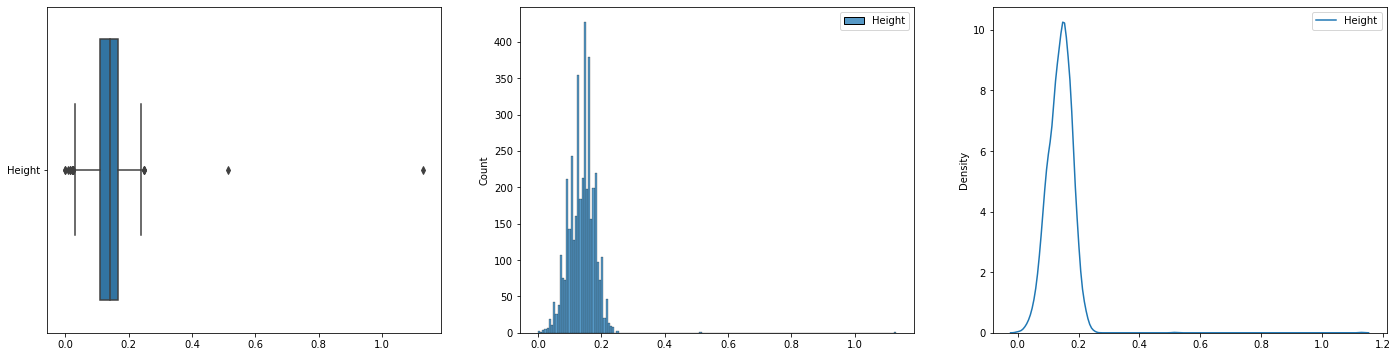

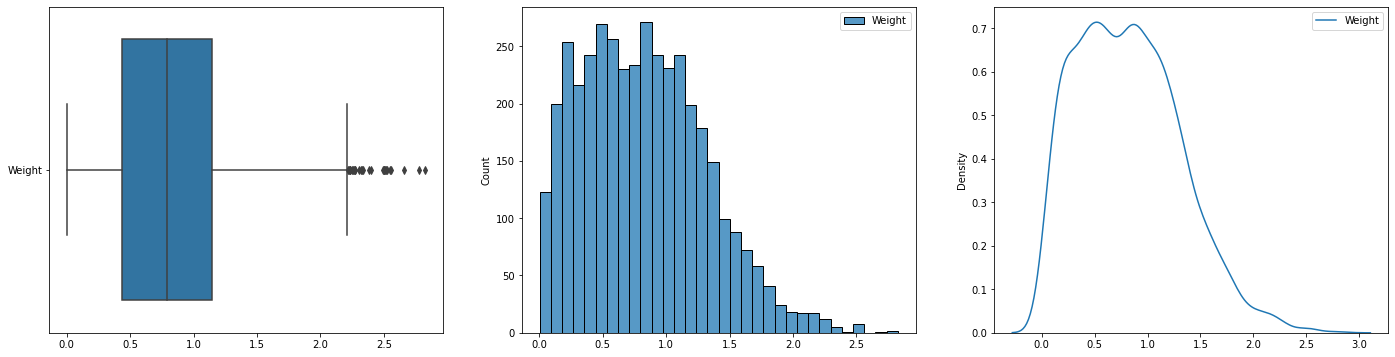

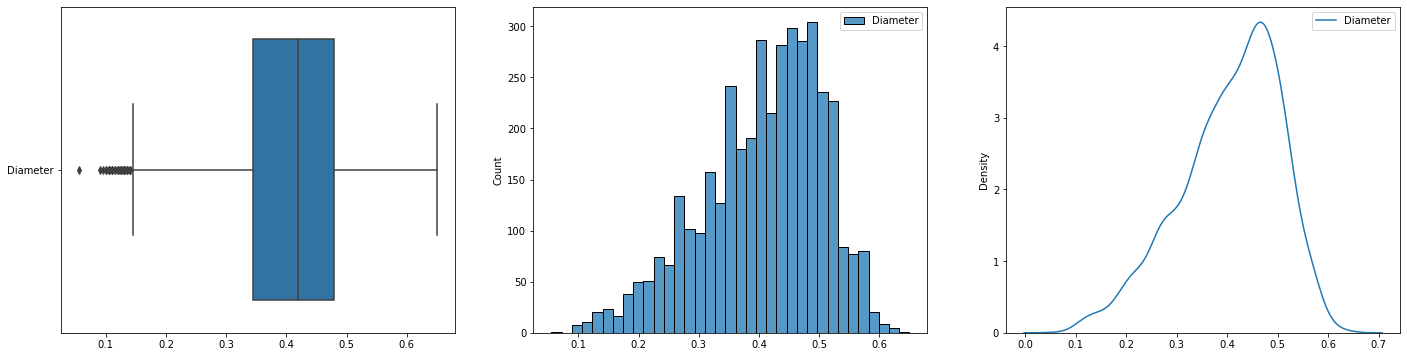

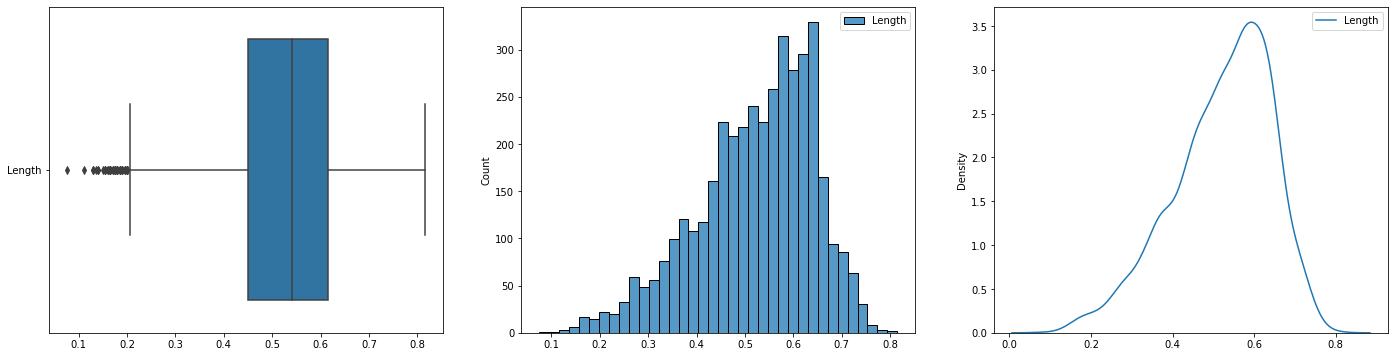

In [32]:
# Set up matplotlib figure with three subplots: 1x3 o o o 
f, axes = plt.subplots(1, 3, figsize=(24, 6)) 

# Plot the basic uni-variate figures for HP 
sb.boxplot(data = height, orient = "h", ax = axes[0]) 
sb.histplot(data = height, ax = axes[1]) 
sb.kdeplot(data = height, ax = axes[2]) 


# Set up matplotlib figure with three subplots: 1x3 o o o 
f, axes = plt.subplots(1, 3, figsize=(24, 6)) 

# Plot the basic uni-variate figures for HP 
sb.boxplot(data = weight, orient = "h", ax = axes[0]) 
sb.histplot(data = weight, ax = axes[1]) 
sb.kdeplot(data = weight, ax = axes[2]) 


# Set up matplotlib figure with three subplots: 1x3 o o o 
f, axes = plt.subplots(1, 3, figsize=(24, 6)) 

# Plot the basic uni-variate figures for HP 
sb.boxplot(data = diameter, orient = "h", ax = axes[0]) 
sb.histplot(data = diameter, ax = axes[1]) 
sb.kdeplot(data = diameter, ax = axes[2]) 


# Set up matplotlib figure with three subplots: 1x3 o o o 
f, axes = plt.subplots(1, 3, figsize=(24, 6)) 

# Plot the basic uni-variate figures for HP 
sb.boxplot(data = length, orient = "h", ax = axes[0]) 
sb.histplot(data = length, ax = axes[1]) 
sb.kdeplot(data = length, ax = axes[2]) 


In [33]:
Q1 = csvData.quantile(0.25) 
Q3 = csvData.quantile(0.75) 
IQR = Q3-Q1 
((csvData < (Q1 - 1.5 * IQR)) | (csvData > (Q3 + 1.5 * IQR))).sum() 

Height      17
Weight      27
Diameter    43
Length      49
dtype: int64

In [34]:
print(height.skew(), 
      weight.skew(), 
      diameter.skew(), 
      length.skew())

Height    3.225046
dtype: float64 Weight    0.538267
dtype: float64 Diameter   -0.595743
dtype: float64 Length   -0.627049
dtype: float64


Length has the most outliers. Weight has the most normal distribution.

# Problem 1b

In [35]:
hw = pd.concat([height, weight], axis = 1).reindex(height.index)
hd = pd.concat([height, diameter], axis = 1).reindex(height.index)
hl = pd.concat([height, length], axis = 1).reindex(height.index)

wd = pd.concat([weight, diameter], axis = 1).reindex(weight.index)
wl = pd.concat([weight, length], axis = 1).reindex(weight.index)

dl = pd.concat([diameter, length], axis = 1).reindex(diameter.index)


<AxesSubplot:>

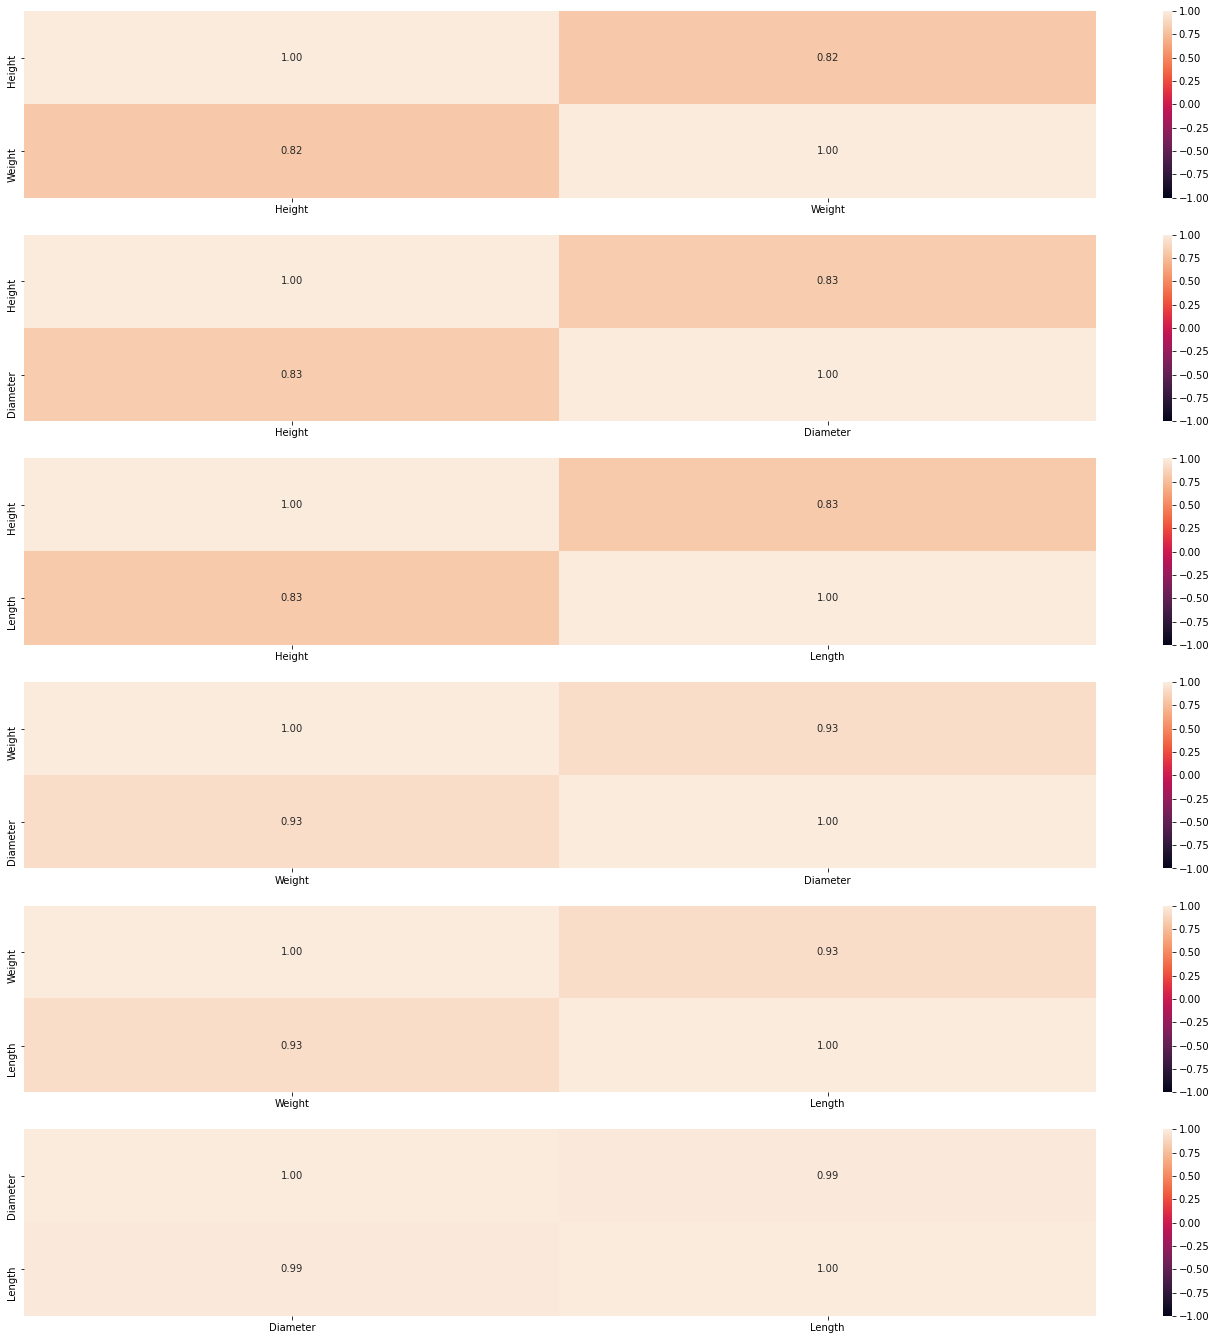

In [47]:
f, axes = plt.subplots(6, 1, figsize=(24, 24)) 

sb.heatmap(hw.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[0])
sb.heatmap(hd.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[1]) 
sb.heatmap(hl.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[2]) 
sb.heatmap(wd.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[3]) 
sb.heatmap(wl.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[4]) 
sb.heatmap(dl.corr(), vmin = -1, vmax = 1, annot = True, fmt = '.2f', ax=axes[5]) 


Diameter, at 0.99 correlation.

# Problem 2

In [49]:
# Import essential models and functions from sklearn 

from sklearn.linear_model import LinearRegression 

from sklearn.model_selection import train_test_split 

from sklearn.metrics import mean_squared_error 

In [52]:
# Split the Dataset into Train and Test 

csv_train, csv_test = train_test_split(csvData, test_size = 0.3) 

# Check the sample sizes 

print('Train Set :', csv_train.shape) 

print('Test Set  :', csv_test.shape) 

Train Set : (2800, 4)
Test Set  : (1200, 4)


Intercept of Regression 	: b =  [0.33607988]
Coefficients of Regression 	: a =  [[0.22743994]]



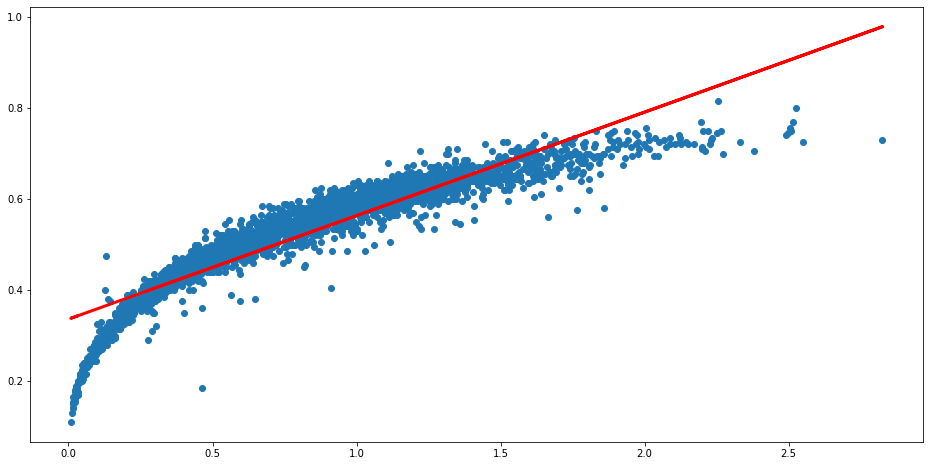

In [58]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Weight']) 
X_train = pd.DataFrame(csv_train['Weight'])
X_test = pd.DataFrame(csv_test['Weight'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

# Linear regression using train data 
linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
 
#Plot using math 
# Coefficients of the Linear Regression line 
print('Intercept of Regression \t: b = ', linreg.intercept_) 
print('Coefficients of Regression \t: a = ', linreg.coef_) 
print() 
 

# Formula for the Regression line 
regline_x = X_train 
regline_y = linreg.intercept_ + linreg.coef_ * X_train 

 

# Plot the Linear Regression line 
f = plt.figure(figsize=(16, 8)) 
plt.scatter(X_train, y_train) 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) 
plt.show() 


Intercept of Regression 	: b =  [0.14486616]
Coefficients of Regression 	: a =  [[2.72694802]]



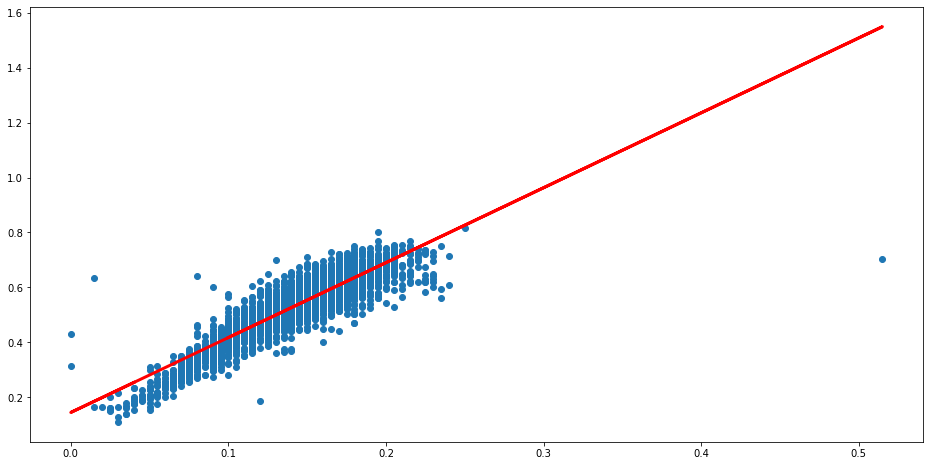

In [59]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Height']) 
X_train = pd.DataFrame(csv_train['Height'])
X_test = pd.DataFrame(csv_test['Height'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

# Linear regression using train data 
linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
 
#Plot using math 
# Coefficients of the Linear Regression line 
print('Intercept of Regression \t: b = ', linreg.intercept_) 
print('Coefficients of Regression \t: a = ', linreg.coef_) 
print() 
 

# Formula for the Regression line 
regline_x = X_train 
regline_y = linreg.intercept_ + linreg.coef_ * X_train 

 

# Plot the Linear Regression line 
f = plt.figure(figsize=(16, 8)) 
plt.scatter(X_train, y_train) 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) 
plt.show()

Intercept of Regression 	: b =  [0.03690077]
Coefficients of Regression 	: a =  [[1.1949253]]



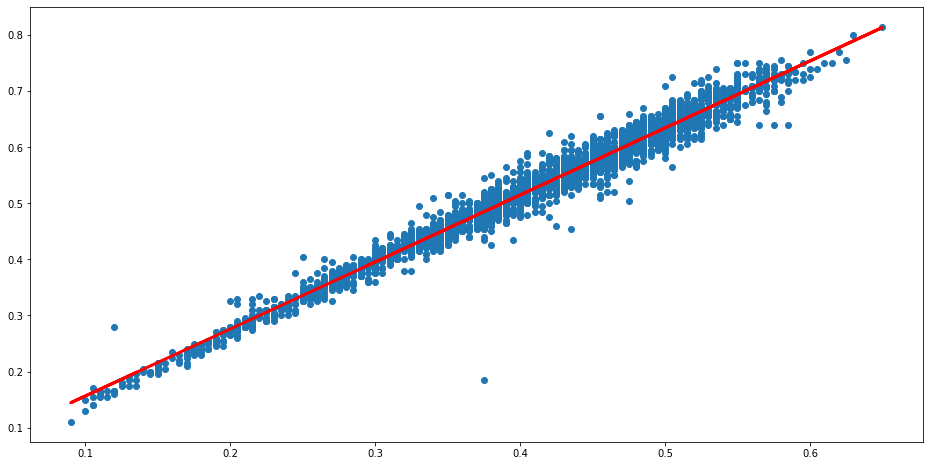

In [60]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Diameter']) 
X_train = pd.DataFrame(csv_train['Diameter'])
X_test = pd.DataFrame(csv_test['Diameter'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

# Linear regression using train data 
linreg = LinearRegression() 
linreg.fit(X_train, y_train) 
 
#Plot using math 
# Coefficients of the Linear Regression line 
print('Intercept of Regression \t: b = ', linreg.intercept_) 
print('Coefficients of Regression \t: a = ', linreg.coef_) 
print() 
 

# Formula for the Regression line 
regline_x = X_train 
regline_y = linreg.intercept_ + linreg.coef_ * X_train 

 

# Plot the Linear Regression line 
f = plt.figure(figsize=(16, 8)) 
plt.scatter(X_train, y_train) 
plt.plot(regline_x, regline_y, 'r-', linewidth = 3) 
plt.show()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -32.25794707686508
Mean Squared Error (MSE) 	: 0.4768410457509954

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -29.486352620512932
Mean Squared Error (MSE) 	: 0.45573455742214936



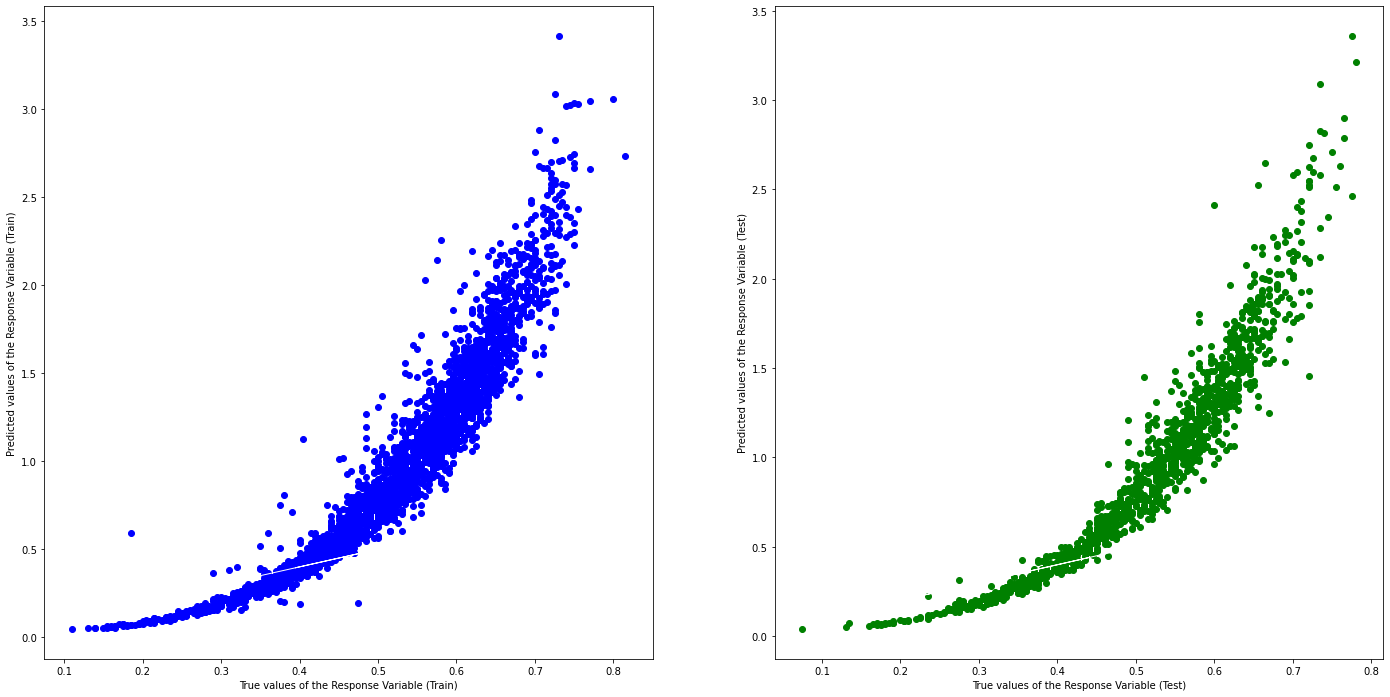

In [68]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Weight']) 
X_train = pd.DataFrame(csv_train['Weight'])
X_test = pd.DataFrame(csv_test['Weight'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

 

# Predict response values using predictor values for both train and test 

y_train_pred = linreg.predict(X_train) 

y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data) 

print('Goodness of Fit of Model \tTrain Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_train, y_train)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train, y_train_pred)) 

print() 

 
# Check the Goodness of Fit (on Test Data) 

print('Goodness of Fit of Model \tTest Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_test, y_test)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test, y_test_pred)) 

print() 

  

# Plot the Predictions vs the True values 

f, axes = plt.subplots(1, 2, figsize=(24, 12)) 

axes[0].scatter(y_train, y_train_pred, color = 'blue') 

axes[0].plot(y_train, y_train, 'w-', linewidth = 1) 

axes[0].set_xlabel('True values of the Response Variable (Train)') 

axes[0].set_ylabel('Predicted values of the Response Variable (Train)') 

 

axes[1].scatter(y_test, y_test_pred, color = 'green') 

axes[1].plot(y_test, y_test, 'w-', linewidth = 1) 

axes[1].set_xlabel('True values of the Response Variable (Test)') 

axes[1].set_ylabel('Predicted values of the Response Variable (Test)') 

plt.show() 

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9730302819539071
Mean Squared Error (MSE) 	: 0.0003866825732504188

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9769192826753396
Mean Squared Error (MSE) 	: 0.00034502915536909157



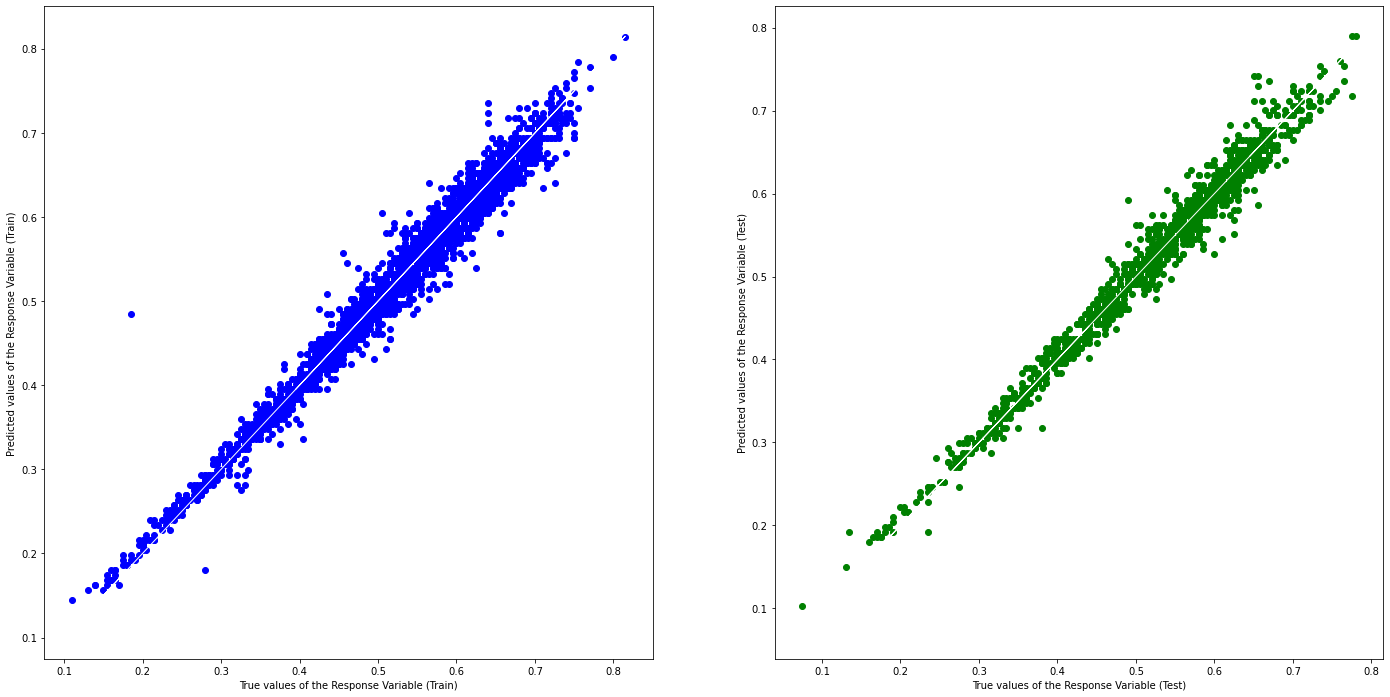

In [69]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Diameter']) 
X_train = pd.DataFrame(csv_train['Diameter'])
X_test = pd.DataFrame(csv_test['Diameter'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

 

# Predict response values using predictor values for both train and test 

y_train_pred = linreg.predict(X_train) 

y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data) 

print('Goodness of Fit of Model \tTrain Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_train, y_train)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train, y_train_pred)) 

print() 

 
# Check the Goodness of Fit (on Test Data) 

print('Goodness of Fit of Model \tTest Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_test, y_test)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test, y_test_pred)) 

print() 

  

# Plot the Predictions vs the True values 

f, axes = plt.subplots(1, 2, figsize=(24, 12)) 

axes[0].scatter(y_train, y_train_pred, color = 'blue') 

axes[0].plot(y_train, y_train, 'w-', linewidth = 1) 

axes[0].set_xlabel('True values of the Response Variable (Train)') 

axes[0].set_ylabel('Predicted values of the Response Variable (Train)') 

 

axes[1].scatter(y_test, y_test_pred, color = 'green') 

axes[1].plot(y_test, y_test, 'w-', linewidth = 1) 

axes[1].set_xlabel('True values of the Response Variable (Test)') 

axes[1].set_ylabel('Predicted values of the Response Variable (Test)') 

plt.show()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -6.66377855777703
Mean Squared Error (MSE) 	: 0.1098806301377674

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -6.100684881005357
Mean Squared Error (MSE) 	: 0.10614675759742222



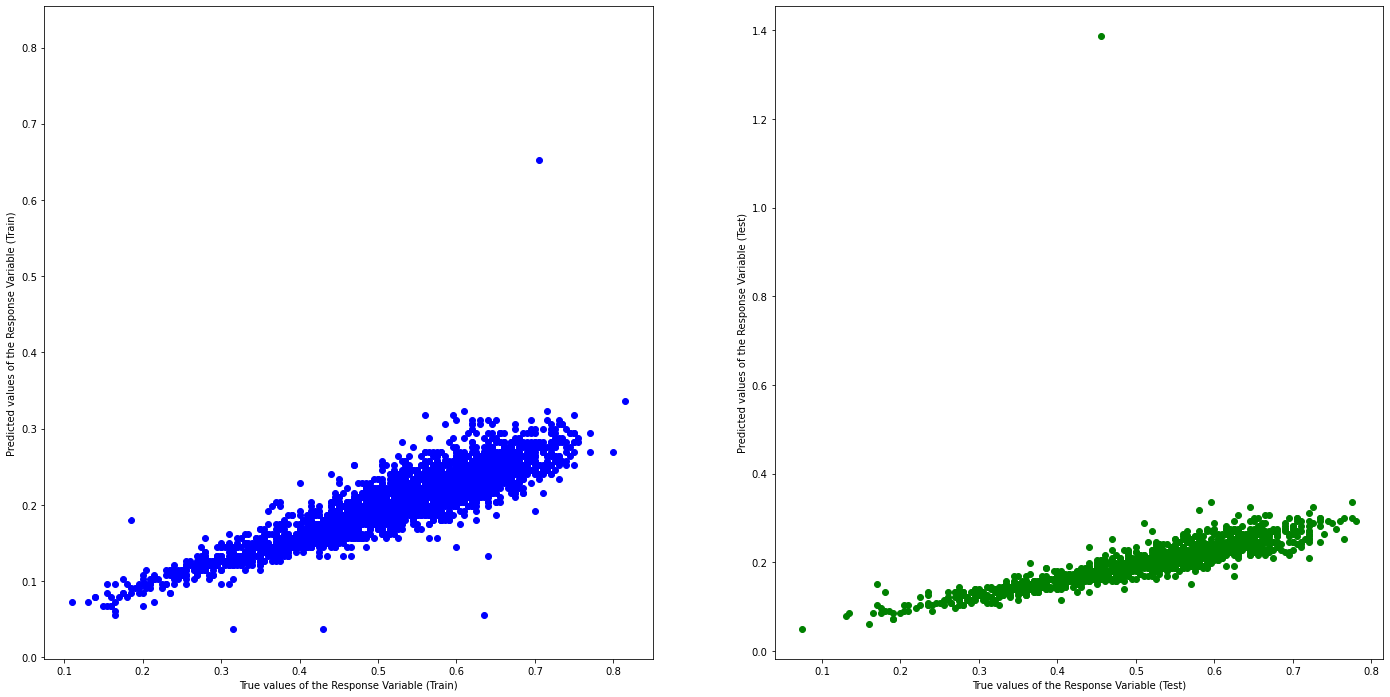

In [70]:
response = pd.DataFrame(csvData['Length'])
predictor = pd.DataFrame(csvData['Height']) 
X_train = pd.DataFrame(csv_train['Height'])
X_test = pd.DataFrame(csv_test['Height'])
y_train = pd.DataFrame(csv_train['Length'])
y_test = pd.DataFrame(csv_test['Length'])

 

# Predict response values using predictor values for both train and test 

y_train_pred = linreg.predict(X_train) 

y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data) 

print('Goodness of Fit of Model \tTrain Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_train, y_train)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_train, y_train_pred)) 

print() 

 
# Check the Goodness of Fit (on Test Data) 

print('Goodness of Fit of Model \tTest Dataset') 

print('Explained Variance (R^2) \t:', linreg.score(X_test, y_test)) 

print('Mean Squared Error (MSE) \t:', mean_squared_error(y_test, y_test_pred)) 

print() 

  

# Plot the Predictions vs the True values 

f, axes = plt.subplots(1, 2, figsize=(24, 12)) 

axes[0].scatter(y_train, y_train_pred, color = 'blue') 

axes[0].plot(y_train, y_train, 'w-', linewidth = 1) 

axes[0].set_xlabel('True values of the Response Variable (Train)') 

axes[0].set_ylabel('Predicted values of the Response Variable (Train)') 

 

axes[1].scatter(y_test, y_test_pred, color = 'green') 

axes[1].plot(y_test, y_test, 'w-', linewidth = 1) 

axes[1].set_xlabel('True values of the Response Variable (Test)') 

axes[1].set_ylabel('Predicted values of the Response Variable (Test)') 

plt.show()

Diameter has highest R^2 and lowest MSE

# Problem 3

In [73]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Extract Response and Predictors
y = pd.DataFrame(csvData["Length"])
X = pd.DataFrame(csvData[["Height", "Weight", "Diameter"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [0.05829966]
Coefficients of Regression 	: a =  [[-0.00307947  0.02070721  1.10121762]]

  Predictors  Coefficients
0     Height     -0.003079
1     Weight      0.020707
2   Diameter      1.101218

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9765463073225107
Mean Squared Error (MSE) 	: 0.0003360957211971371

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9722036422250704
Mean Squared Error (MSE) 	: 0.00041769895628548844

